<a href="https://colab.research.google.com/github/luis314159/portfolio/blob/master/redes/RNN2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**<center>Universidad Autónoma de Chihuahua**

<div align= "center">
<img src="https://uach.mx/assets/media/snippet/62/escudo-web-header-black.svg" width="350" height="350" />

</div>
<div align ="center">
<img src="https://cimav.edu.mx/wp-content/uploads/2017/05/ingenieria-uach.png" width="200" height="200" />
</div>

##<center>Maestría en Ingeniería en Computación 
##<center>Redes Neuronales
##<center>Tarea 7
##<center>Recurrent Neural Networks 
###<center>Catedrática: Dra. Graciela María de Jesús Ramírez Alonso
###<center>Estudiante: Ing. Luis Ángel Almazán López</center>


<center>
Ninguna pérdida debe sernos más sensible que la del tiempo, puesto que es irreparable.


$Zenón \ de\ Citio$

<!-- badges: start -->
[![@luis3.14159](https://img.shields.io/badge/@luis314159-gitHub-darkred?&logoColor=white)](https://github.com/luis314159/) 
[![Platzi](https://img.shields.io/badge/Platzi_count-luisangelalmaznlpez-green&logoColor=white)](https://platzi.com/p/luisangelalmaznlpez/)
![Email](https://img.shields.io/badge/email-p364977@uach.mx-darkblue?&logoColor=white)
<!-- badges: end -->


#Introducción 
En este trabajo se presentará como se logró crear una red neuronal recurrente (RNN) para texto,así el preproseamiento que se realizó a los datos para entrenar el modelo, como los detalles de la implementación.


##RNN
Las redes neuronales recuurente son redes nueronales artificiales cuyas conexiones pueden crear ciclos, a continuación puede ver un ejemplo de las conexiones e estas redes:

Mounted at /content/drive


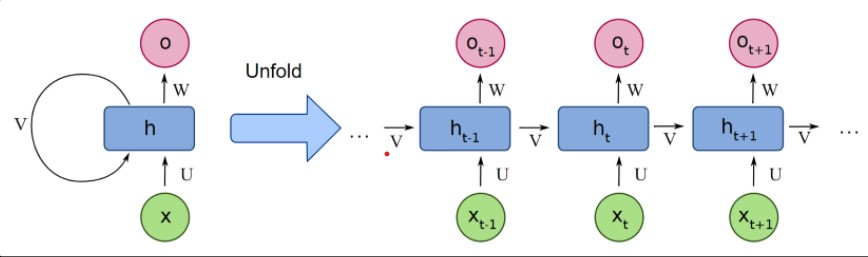

In [2]:
#@title Images
from google.colab import drive
from IPython.display import Image 
drive.mount('/content/drive')
Image("/content/drive/MyDrive/REDES/tarea7/Captura de pantalla 2022-10-17 150103.jpg")

#1-Preparando Data y set up



In [17]:
import numpy as np

import tensorflow_datasets as tfds
import tensorflow as tf

tfds.disable_progress_bar()

importamos matplotlib y creamos una función para graficar

In [3]:
import matplotlib.pyplot as plt


def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

##1.1- Leer el data seet

Input(x)->comentarios (review)

Output(y) -> Sentimientos

In [4]:
import pandas as pd
df_review = pd.read_csv("/content/drive/MyDrive/Machine_learning/IMDB/IMDB Dataset.csv.zip")
df_review.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [6]:
df_review.value_counts('sentiment')

sentiment
negative    25000
positive    25000
dtype: int64

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid') # darkgrid, white grid, dark, white and ticks
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=13)          # controls default text sizes

In [8]:
df_review.value_counts('sentiment')

sentiment
negative    25000
positive    25000
dtype: int64

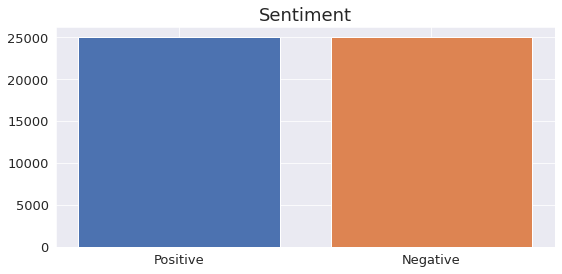

In [9]:
colors = sns.color_palette('deep')

plt.figure(figsize=(8,4), tight_layout=True)
plt.bar(x=['Positive', 'Negative'],
        height=df_review.value_counts(['sentiment']),
        color=colors[:2])
plt.title('Sentiment')
plt.savefig('sentiment.png')
plt.show()

##1.3 Separar data para entrenar(Train) y (Test)


In [10]:
from sklearn.model_selection import train_test_split

train, test=train_test_split(df_review, test_size=0.33,random_state=42)

In [13]:
train_x,train_y=train['review'], train['sentiment']
test_x,test_y=test['review'], test['sentiment']

In [32]:
train_x.head()

23990    Randolph Scott is heading into Albuquerque to ...
8729     I like this movie cause it has a good approach...
3451     Well don't expect anything deep an meaningful....
2628     This really should deserve a "O" rating, or ev...
38352    Dwight Frye steals the show in this one as a f...
Name: review, dtype: object

In [30]:
train_x.shape

(33500,)

#2.-Representación de texto
Existen varias formas para procesar el texto, entre ellas unas de las más comunes son CountVectorizer y Tfidf.

## CountVectorizer
El concepto de esta forma de procesamiento de texto,mide la frecuencia con la que aparece cada palabra en una oración, se crea una matriz donde cada columna es una plabra diferente que del dataset.
## Tfidf
La idea esta forma de procesamiento, es medir la relevancia de una palabra que no este en muy repetida en otros reviews o muestras





## 2.1 Count Vectorizer 

Ejemplo:


In [2]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
text = ["Amo escribir codigo en python. Amo el codigo en Python",
        "Odio escribir codigo en Java, Odio el codigo Java"]
df = pd.DataFrame({"review": ['review1', 'review2'], 'text':text})
cv = CountVectorizer()
cv_matrix = cv.fit_transform(df['text'])
df_dtm = pd.DataFrame(cv_matrix.toarray(), index=df['review'].values, columns=cv.get_feature_names())
df_dtm

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,amo,codigo,el,en,escribir,java,odio,python
review1,2,2,1,2,1,0,0,2
review2,0,2,1,1,1,2,2,0


##2.2 Tfidf (Term frequency - inverse document frequency)
Ejemplo:

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
text = ["I love writing code in Python. I love Python code",
        "I hate writing code in Java. I hate Java code"]

df = pd.DataFrame({'review': ['review1', 'review2'], 'text':text})
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['text'])
df_dtm = pd.DataFrame(tfidf_matrix.toarray(), index=df['review'].values, columns=tfidf.get_feature_names())
df_dtm


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,code,hate,java,love,python,writing
review1,0.438501,0.000000,0.000000,0.616298,0.616298,0.21925
review2,0.438501,0.616298,0.616298,0.000000,0.000000,0.21925


##2.3 Transformar data de texto a númerica

In [14]:
tfidf = TfidfVectorizer(stop_words='english')
train_x_vector = tfidf.fit_transform(train_x)
test_x_vector = tfidf.transform(test_x)

In [15]:
train_x_vector

<33500x86049 sparse matrix of type '<class 'numpy.float64'>'
	with 2960583 stored elements in Compressed Sparse Row format>

In [36]:
train_x_vector.shape[1]

86049

## Create the model

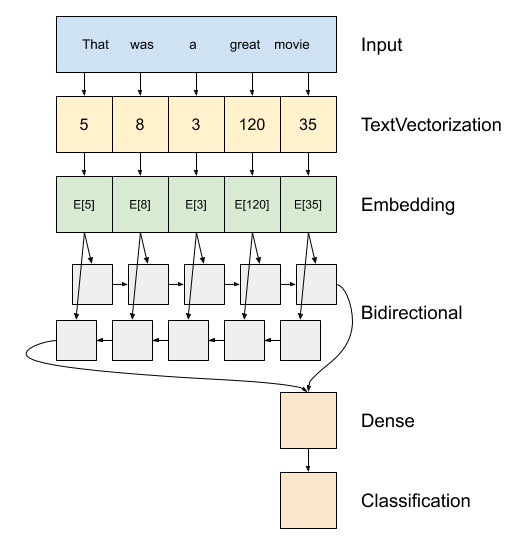

In [ ]:
##@title Create the model
Image("/content/drive/MyDrive/REDES/tarea7/bidirectional.png")

In [ ]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [48]:
# Let's build the RNN
model = tf.keras.Sequential()

# Add a RNN layer with 5 units.
model.add(tf.keras.layers.SimpleRNN(30,
                           activation = 'tanh',
                           use_bias=True,
                           input_shape = (train_x_vector.shape[1],1) ))
# Add a dropout layer (penalizing more complex models) -- prevents overfitting
model.add(tf.keras.layers.Dropout(rate=0.2))


# Add a Dense layer with 1 units (Since we are doing a regression task.
model.add(tf.keras.layers.Dense(1))

# Evaluating loss function of MSE using the adam optimizer.
model.compile(loss='mean_squared_error', optimizer = 'adam')

# Print out architecture.
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_7 (SimpleRNN)    (None, 30)                960       
                                                                 
 dropout_3 (Dropout)         (None, 30)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 31        
                                                                 
Total params: 991
Trainable params: 991
Non-trainable params: 0
_________________________________________________________________


In [49]:
model.fit(train_x_vector)

InvalidArgumentError: ignored

## Setup input pipeline


The IMDB large movie review dataset is a *binary classification* dataset—all the reviews have either a *positive* or *negative* sentiment.

Download the dataset using [TFDS](https://www.tensorflow.org/datasets). See the [loading text tutorial](https://www.tensorflow.org/tutorials/load_data/text) for details on how to load this sort of data manually.


In [14]:
dataset, info = tfds.load('imdb_reviews', with_info=True,
                          as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

train_dataset.element_spec

Dataset imdb_reviews downloaded and prepared to ~/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


(TensorSpec(shape=(), dtype=tf.string, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None))

Initially this returns a dataset of (text, label pairs):

In [15]:
for example, label in train_dataset.take(1):
  print('text: ', example.numpy())
  print('label: ', label.numpy())

text:  b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."
label:  0


In [ ]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [16]:
# Let's build the RNN
model = tf.keras.Sequential()

# Add a RNN layer with 3 units.
model.add(tf.layers.SimpleRNN(3,
                           activation = 'tanh',
                           use_bias=True,
                           input_shape=(X.shape[1], X.shape[2])))
# Add a dropout layer (penalizing more complex models) -- prevents overfitting
model.add(tf.layers.Dropout(rate=0.2))


# Add a Dense layer with 1 units (Since we are doing a regression task.
model.add(tf.layers.Dense(1))

# Evaluating loss function of MSE using the adam optimizer.
model.compile(loss='mean_squared_error', optimizer = 'adam')

# Print out architecture.
model.summary()

NameError: ignored

Next shuffle the data for training and create batches of these `(text, label)` pairs:

In [16]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

In [17]:
train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [18]:
for example, label in train_dataset.take(1):
  print('texts: ', example.numpy()[:3])
  print()
  print('labels: ', label.numpy()[:3])

texts:  [b"After just watching FIVE ACROSS THE EYES, I gotta be honest...I just didn't like it. I had read so many good reviews on this movie, but I just did'nt get where these reviews have came from,<br /><br />I have got a lot of time for newcomers into film-making, and I'm sure the directors will do well for themselves, but the budget they had was the main problem, there was two cameras used in the entire film (which was OK) but they seemed like really cheap cameras. Another problem was the sound, you get all these girls screaming and shouting all at the same time, all talking on top of each other - it's just impossible to hear what they're saying.<br /><br />It had a good idea going for it, in a nutshell, they hit a parked car then drive off, a short while later they are getting chased by the car they hit, driven by a mad woman, who wants to kill them, and has plenty of chances to do so!...and on the other hand the girls have plenty of chances to escape, but don't! <br /><br />Very

## Create the text encoder

The raw text loaded by `tfds` needs to be processed before it can be used in a 


model. The simplest way to process text for training is using the `TextVectorization` layer. This layer has many capabilities, but this tutorial sticks to the default behavior.

Create the layer, and pass the dataset's text to the layer's `.adapt` method:

In [19]:
VOCAB_SIZE = 1000
encoder = tf.keras.layers.TextVectorization(
    max_tokens=VOCAB_SIZE)
encoder.adapt(train_dataset.map(lambda text, label: text))

The `.adapt` method sets the layer's vocabulary. Here are the first 20 tokens. After the padding and unknown tokens they're sorted by frequency: 

In [20]:
vocab = np.array(encoder.get_vocabulary())
vocab[:20]

array(['', '[UNK]', 'the', 'and', 'a', 'of', 'to', 'is', 'in', 'it', 'i',
       'this', 'that', 'br', 'was', 'as', 'for', 'with', 'movie', 'but'],
      dtype='<U14')

Once the vocabulary is set, the layer can encode text into indices. The tensors of indices are 0-padded to the longest sequence in the batch (unless you set a fixed `output_sequence_length`):

In [21]:
encoded_example = encoder(example)[:3].numpy()
encoded_example

array([[101,  41, 147, ...,   0,   0,   0],
       [ 10,   1, 141, ...,   0,   0,   0],
       [ 11, 699,  18, ...,   0,   0,   0]])

With the default settings, the process is not completely reversible. There are three main reasons for that:

1. The default value for `preprocessing.TextVectorization`'s `standardize` argument is `"lower_and_strip_punctuation"`.
2. The limited vocabulary size and lack of character-based fallback results in some unknown tokens.

In [22]:
for n in range(3):
  print("Original: ", example[n].numpy())
  print("Round-trip: ", " ".join(vocab[encoded_example[n]]))
  print()

Original:  b"After just watching FIVE ACROSS THE EYES, I gotta be honest...I just didn't like it. I had read so many good reviews on this movie, but I just did'nt get where these reviews have came from,<br /><br />I have got a lot of time for newcomers into film-making, and I'm sure the directors will do well for themselves, but the budget they had was the main problem, there was two cameras used in the entire film (which was OK) but they seemed like really cheap cameras. Another problem was the sound, you get all these girls screaming and shouting all at the same time, all talking on top of each other - it's just impossible to hear what they're saying.<br /><br />It had a good idea going for it, in a nutshell, they hit a parked car then drive off, a short while later they are getting chased by the car they hit, driven by a mad woman, who wants to kill them, and has plenty of chances to do so!...and on the other hand the girls have plenty of chances to escape, but don't! <br /><br />Ve

## Create the model

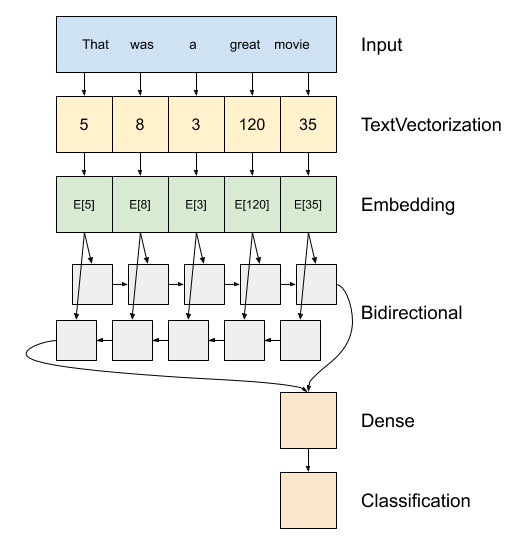

In [12]:
##@title Create the model
Image("/content/drive/MyDrive/REDES/tarea7/bidirectional.png")

Above is a diagram of the model. 

1. This model can be build as a `tf.keras.Sequential`.

2. The first layer is the `encoder`, which converts the text to a sequence of token indices.

3. After the encoder is an embedding layer. An embedding layer stores one vector per word. When called, it converts the sequences of word indices to sequences of vectors. These vectors are trainable. After training (on enough data), words with similar meanings often have similar vectors.

  This index-lookup is much more efficient than the equivalent operation of passing a one-hot encoded vector through a `tf.keras.layers.Dense` layer.

4. A recurrent neural network (RNN) processes sequence input by iterating through the elements. RNNs pass the outputs from one timestep to their input on the next timestep.

  The `tf.keras.layers.Bidirectional` wrapper can also be used with an RNN layer. This propagates the input forward and backwards through the RNN layer and then concatenates the final output. 

  * The main advantage of a bidirectional RNN is that the signal from the beginning of the input doesn't need to be processed all the way through every timestep to affect the output.  

  * The main disadvantage of a bidirectional RNN is that you can't efficiently stream predictions as words are being added to the end.

5. After the RNN has converted the sequence to a single vector the two `layers.Dense` do some final processing, and convert from this vector representation to a single logit as the classification output. 


The code to implement this is below:

In [24]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.RNN(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

ValueError: ignored

In [ ]:
# Let's build the RNN
model = tf.keras.Sequential()

# Add a RNN layer with 3 units.
model.add(tf.layers.SimpleRNN(3,
                           activation = 'tanh',
                           use_bias=True,
                           input_shape=(X.shape[1], X.shape[2])))
# Add a dropout layer (penalizing more complex models) -- prevents overfitting
model.add(tf.layers.Dropout(rate=0.2))


# Add a Dense layer with 1 units (Since we are doing a regression task.
model.add(tf.layers.Dense(1))

# Evaluating loss function of MSE using the adam optimizer.
model.compile(loss='mean_squared_error', optimizer = 'adam')

# Print out architecture.
model.summary()

Please note that Keras sequential model is used here since all the layers in the model only have single input and produce single output. In case you want to use stateful RNN layer, you might want to build your model with Keras functional API or model subclassing so that you can retrieve and reuse the RNN layer states. Please check [Keras RNN guide](https://www.tensorflow.org/guide/keras/rnn#rnn_state_reuse) for more details.

The embedding layer [uses masking](https://www.tensorflow.org/guide/keras/masking_and_padding) to handle the varying sequence-lengths. All the layers after the `Embedding` support masking:

In [ ]:
print([layer.supports_masking for layer in model.layers])

[False, True, True, True, True]


To confirm that this works as expected, evaluate a sentence twice. First, alone so there's no padding to mask:

In [ ]:
# predict on a sample text without padding.

sample_text = ('The movie was cool. The animation and the graphics '
               'were out of this world. I would recommend this movie.')
predictions = model.predict(np.array([sample_text]))
print(predictions[0])

1/1 [==============================] - 7s 7s/step
[0.02164261]


Now, evaluate it again in a batch with a longer sentence. The result should be identical:

In [ ]:
# predict on a sample text with padding

padding = "the " * 2000
predictions = model.predict(np.array([sample_text, padding]))
print(predictions[0])

1/1 [==============================] - 0s 141ms/step
[0.02164261]


Compile the Keras model to configure the training process:

In [ ]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

## Train the model

In [ ]:
history = model.fit(train_dataset, epochs=10,
                    validation_data=test_dataset,
                    validation_steps=30)

Epoch 1/10
391/391 [==============================] - 41s 85ms/step - loss: 0.6460 - accuracy: 0.5752 - val_loss: 0.5247 - val_accuracy: 0.7385
Epoch 2/10
391/391 [==============================] - 34s 86ms/step - loss: 0.4261 - accuracy: 0.8031 - val_loss: 0.3663 - val_accuracy: 0.8339
Epoch 3/10
391/391 [==============================] - 32s 81ms/step - loss: 0.3402 - accuracy: 0.8503 - val_loss: 0.3425 - val_accuracy: 0.8464
Epoch 4/10
391/391 [==============================] - 32s 82ms/step - loss: 0.3202 - accuracy: 0.8601 - val_loss: 0.3769 - val_accuracy: 0.8568
Epoch 5/10
391/391 [==============================] - 33s 84ms/step - loss: 0.3163 - accuracy: 0.8646 - val_loss: 0.3342 - val_accuracy: 0.8516
Epoch 6/10
391/391 [==============================] - 32s 82ms/step - loss: 0.3052 - accuracy: 0.8688 - val_loss: 0.3229 - val_accuracy: 0.8568
Epoch 7/10
391/391 [==============================] - 31s 79ms/step - loss: 0.3031 - accuracy: 0.8694 - val_loss: 0.3210 - val_accuracy:

In [ ]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

391/391 [==============================] - 18s 47ms/step - loss: 0.3121 - accuracy: 0.8594
Test Loss: 0.31209486722946167
Test Accuracy: 0.8593999743461609


(0.0, 0.6635731816291809)

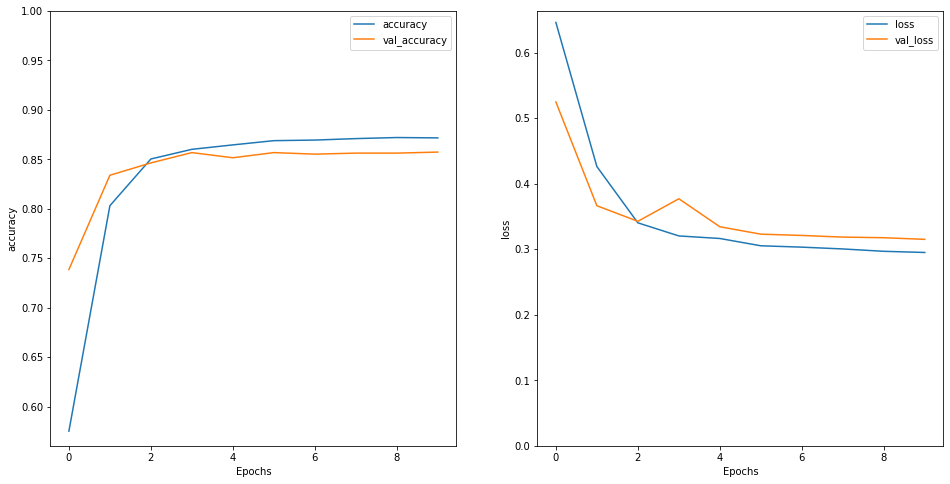

In [ ]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)

Run a prediction on a new sentence:

If the prediction is >= 0.0, it is positive else it is negative.

In [ ]:
sample_text = ('The movie was cool. The animation and the graphics '
               'were out of this world. I would recommend this movie.')
predictions = model.predict(np.array([sample_text]))

1/1 [==============================] - 3s 3s/step


## Stack two or more LSTM layers

Keras recurrent layers have two available modes that are controlled by the `return_sequences` constructor argument:

* If `False` it returns only the last output for each input sequence (a 2D tensor of shape (batch_size, output_features)). This is the default, used in the previous model.

* If `True` the full sequences of successive outputs for each timestep is returned (a 3D tensor of shape `(batch_size, timesteps, output_features)`).

Here is what the flow of information looks like with `return_sequences=True`:

![layered_bidirectional](images/layered_bidirectional.png)

The interesting thing about using an `RNN` with `return_sequences=True` is that the output still has 3-axes, like the input, so it can be passed to another RNN layer, like this:

In [ ]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(len(encoder.get_vocabulary()), 64, mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])

In [ ]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_dataset, epochs=10,
                    validation_data=test_dataset,
                    validation_steps=30)

Epoch 1/10
391/391 [==============================] - 72s 148ms/step - loss: 0.6047 - accuracy: 0.6011 - val_loss: 0.4259 - val_accuracy: 0.8010
Epoch 2/10
391/391 [==============================] - 55s 139ms/step - loss: 0.3806 - accuracy: 0.8350 - val_loss: 0.3473 - val_accuracy: 0.8417
Epoch 3/10
391/391 [==============================] - 54s 138ms/step - loss: 0.3319 - accuracy: 0.8580 - val_loss: 0.3498 - val_accuracy: 0.8339
Epoch 4/10
355/391 [==========================>...] - ETA: 4s - loss: 0.3192 - accuracy: 0.8650

In [ ]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

In [ ]:
# predict on a sample text without padding.

sample_text = ('The movie was not good. The animation and the graphics '
               'were terrible. I would not recommend this movie.')
predictions = model.predict(np.array([sample_text]))
print(predictions)

In [ ]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')

Check out other existing recurrent layers such as [GRU layers](https://www.tensorflow.org/api_docs/python/tf/keras/layers/GRU).

If you're interested in building custom RNNs, see the [Keras RNN Guide](https://www.tensorflow.org/guide/keras/rnn).
